C:\Users\sonip\AppData\Local\Temp\ipykernel_1516\350098549.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_da['job_skills']=df_da['job_skills'].apply(lambda x: ast.literal_eval(x))


<Axes: xlabel='month_name'>

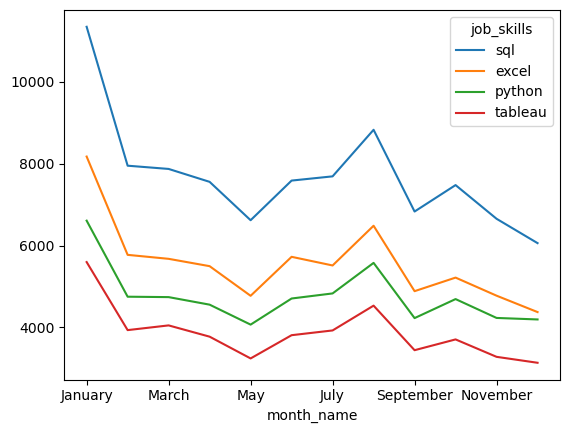

In [1]:

# Importing Libraries
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt  

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])

title = input("Enter the job title to filter by (e.g., 'Data Scientist'): ")
head_count=int(input("Enter the minimum head count (e.g., 10): "))

df['month_name']=df['job_posted_date'].dt.month_name()
df_req= df[df['job_skills'].notna()]
df_da= df_req[df_req['job_title_short']==title]

import ast
df_da['job_skills']=df_da['job_skills'].apply(lambda x: ast.literal_eval(x))

df_da_exp=df_da.explode('job_skills')
df_da_pt= df_da_exp.pivot_table(index='month_name',columns='job_skills',aggfunc='size',fill_value=0)

top_skills = df_da_exp.groupby('job_skills').size().sort_values(ascending=False).head(head_count).index
df_da_pt.loc[:,top_skills].reindex(['January', 'February', 'March', 'April', 'May', 'June',
                                    'July', 'August', 'September', 'October', 'November', 'December']).plot(kind='line')
